## Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load and read dataset
df = pd.read_csv(r"C:\Users\Owner\Desktop\Viktoriia\UofT\visualization\02_activities\assignments\assignment_4\ontario_top_baby_names_female_1917-2022.csv", skiprows=1)
df.head()

,Year/Année,Name/Nom,Frequency/Fréquence
0,1913,MARGARET,6
1,1913,MARY,7
2,1914,GLADYS,6
3,1914,MARGARET,9
4,1914,MARY,9


In [4]:
# check the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91179 entries, 0 to 91178
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year/Année           91179 non-null  int64 
 1   Name/Nom             91179 non-null  object
 2   Frequency/Fréquence  91179 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [8]:
# rename the columns 
df = df.rename(columns={"Year/Année": "Year", "Name/Nom": "Name", "Frequency/Fréquence": "Frequency"})
df.head()

,Year,Name,Frequency
0,1913,MARGARET,6
1,1913,MARY,7
2,1914,GLADYS,6
3,1914,MARGARET,9
4,1914,MARY,9


In [10]:
# find missing values
df.isnull().sum()

Year         0
Name         0
Frequency    0
dtype: int64

In [11]:
# check existing duplicates
df.duplicated().sum()

0

In [12]:
# clean the format of the Names: converts all characters to uppercase and removes spaces at the beginning and end of a string
df["Name"] = df["Name"].str.strip().str.upper()

In [13]:
# check the numbers of unique Names
df['Name'].nunique()

5025

## Visualization_1

#### What is the most popular Names in Ontario (Top-10)? 

In [19]:
# group the table by the Names to define the numbers of usage in 1913-2022 
df_group = (
    df.groupby(["Name"])["Frequency"]
    .sum() # The sum of the owners of the name 
    .reset_index(name="Total_Users"))  # Create a new table with a new column 
df_group.head(10)

,Name,Total_Users
0,AADHIRA,32
1,AADHYA,172
2,AADYA,90
3,AAFIYAH,7
4,AAHANA,64
5,AAIMA,18
6,AAIRA,80
7,AAIRAH,38
8,AALEYAH,7
9,AALIYA,67


In [23]:
# sort the names by the frequency
df_group_sorted = df_group.sort_values(by="Total_Users", ascending=False)
df_group_sorted.head(20)

,Name,Total_Users
3219,MARIE,127395
3298,MARY,118080
2185,JENNIFER,61694
3181,MARGARET,59917
1445,ELIZABETH,51307
4216,SARAH,50635
3783,PATRICIA,50042
4564,SUSAN,47591
2892,LINDA,45376
680,BARBARA,44096


In [ ]:
# create a dataset with top 10 Names for the next visualization
top_10 = df_group.nlargest(10, "Total_Users")
top_10

,Name,Total_Users
3219,MARIE,127395
3298,MARY,118080
2185,JENNIFER,61694
3181,MARGARET,59917
1445,ELIZABETH,51307
4216,SARAH,50635
3783,PATRICIA,50042
4564,SUSAN,47591
2892,LINDA,45376
680,BARBARA,44096


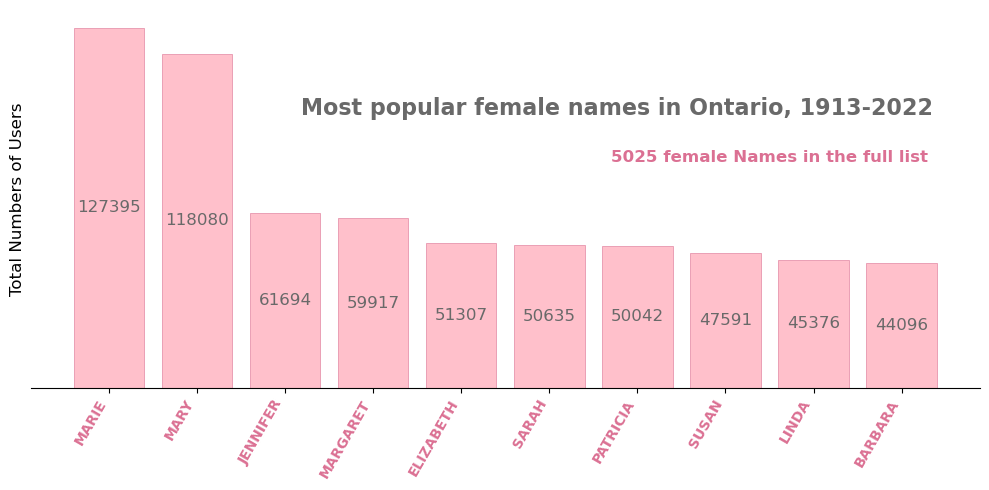

In [26]:
# create the bar plot for visualization Top-10 Names 
plt.figure(figsize=(10, 5))  # set the size of the plot
bars = plt.bar(top_10["Name"], top_10["Total_Users"], color='pink', edgecolor='palevioletred', linewidth=0.4)  # create bar graph

# Modify the graph features
plt.bar_label(bars, label_type='center', fontsize=12, color='dimgrey') 
plt.title('Most popular female names in Ontario, 1913-2022', fontsize=16, color='dimgrey', fontweight='bold', loc='right', y=0.7, x=0.95) 
plt.xticks(color='palevioletred', fontweight='bold', rotation=60, ha='right') 
plt.ylabel('Total Numbers of Users', fontsize=12) 
plt.yticks([]) 
plt.tight_layout() 

# delete the boundaries
ax = plt.gca() 
ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)   

# add the text annotation
plt.text(9.3, 80000,  
    '5025 female Names in the full list',  
    fontsize=12, color='palevioletred', fontweight='bold', ha='right'
)
plt.show()  

## Visualization_2

#### What are the rarest female names in Ontario?  

The dataset doesn't include Names with 5 or fewer owners (for privacy). That is why have chosen frequency = 6 for the rarest Names. 

In [27]:
# Define rarest Names in the history of the observations 
rare_names = df_group_sorted[df_group_sorted["Total_Users"] <= 6]
rare_names

,Name,Total_Users
4805,VAANYA,6
4800,UNICE,6
1773,GREY,6
3905,RANYA,6
4803,UTE,6
...,...,...
620,AVEYA,6
4608,TALIYA,6
4231,SARON,6
4612,TAMANA,6


In [28]:
# for visualization, create a dataset with randomly chosen 50 rare Names
rare_50 = rare_names.sample(n=50, random_state=42)
rare_50

,Name,Total_Users
4973,ZAYAH,6
400,ANGÈLE,6
2997,LUIGIA,6
2254,JOOD,6
3740,OONA,6
105,ADRIELLE,6
4995,ZINNIA,6
3339,MAXWELL,6
408,ANIELA,6
2900,LINH,6


In [29]:
# import wordcloud
from wordcloud import WordCloud

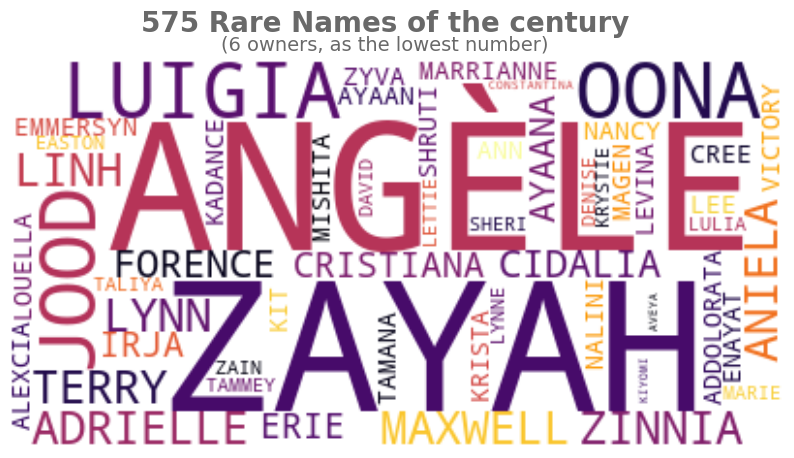

In [31]:
# make wordcloud
text = " ".join(each for each in rare_50.Name) # choose text

wordcloud = WordCloud(background_color="white",  # create a wordcloud plot
colormap = 'inferno').generate(text)

# mdify a plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, 
interpolation='bilinear') 
ax.axis("off")

# add text annotations
annotation_text_1 = "575 Rare Names of the century"
plt.figtext(0.5, 0.74, annotation_text_1, color='dimgrey', fontweight='bold', fontsize=20, ha='center', va='top')

annotation_text_2 = "(6 owners, as the lowest number)"
plt.figtext(0.5, 0.715, annotation_text_2, color='dimgrey', fontsize=14, ha='center', va='top')

plt.show()